# **Rock-Paper-Scissor Competition (40%)**

For this competition, we will use the Game (https://cloudstor.aarnet.edu.au/plus/s/6QNijohkrfMZ0H7) dataset. This dataset contains images of hand gestures from the Rock-Paper-Scissors game. 

The dataset contains a total of 2188 images corresponding to the 'Rock' (726 images), 'Paper' (710 images) and 'Scissors' (752 images) hand gestures of the Rock-Paper-Scissors game. All image are taken on a green background with relatively consistent ligithing and white balance.

All images are RGB images of 300 pixels wide by 200 pixels high in .png format. The images are separated in three sub-folders named 'rock', 'paper' and 'scissors' according to their respective class.

The task is to categorize each hand guesters into one of three categories (Rock/Paper/Scissor). 

We provide a baseline by the following steps:


*   Loding and Analysing the dataset using torchvision.
*   Defining a simple convolutional neural network. 
*   How to use existing loss function for the model learning. 
*   Train the network on the training data. 
*   Test the trained network on the testing data. 

The following trick/tweak(s) could be considered:
-------
1. Change of advanced training parameters: Learning Rate, Optimizer, Batch-size, Number of Max Epochs, and Drop-out. 
2. Use of a new loss function.
3. Data augmentation
4. Architectural Changes: Batch Normalization, Residual layers, Attention Block, and other varients.

Your code should be modified from the provided baseline. A pdf report is required to explain the tricks you employed, and the imporvements they achieved.
Marking Rules:
-------
We will mark the competition based on the final test accuracy on testing images and your report.

Final mark = acc_mark + efficiency mark + report mark + bonus mark
###Acc_mark 15:

We will rank all the submission results based on their test accuracy. The top 30% of the students will get full marks.


|Accuracy|Mark|
|---|---|
| Top 30% in the class|          15|
|30%-50%|         11|
|50%-80%  |        7|
| 80%-90%  |      3|
| 90%-100%  |      1|
|Not implemented| 0|

###Efficiency mark 5:

Efficiency is evaluated by the computational costs (flops: https://en.wikipedia.org/wiki/FLOPS). Please report the computational costs for your final model and attach the code/process about how you calculate it.

|Efficiency|Mark|
|---|---|
| Top 30% in the class|          5|
|30%-50%|         4|
|50%-80%  |        3|
| 80%-90%  |      2|
| 90%-100%  |      2|
|Not implemented| 0|

###Report mark 20:
1. Introduction and your understanding to the baseline model: 2 points

2. Employed more than three tricks with ablation studies to improve the accuracy: 6 points

Clearly explain the reference, motivation and design choice for each trick/tweak(s). Providing the experimental results in tables.
Example table:

|Trick1|Trick2|Trick3|Accuracy|
|---|---|---|---|
|N|N|N|60%|
|Y|N|N|65%|
|Y|Y|N|77%|
|Y|Y|Y|82%|

Observation and discussion based on the experiment results.

3. Expaination of the methods on reducing the computational cost and/or improve the trade-off between accuracy and efficiency: 4 points

4. Explaination of the code implementation：3 points

5. Visulization results: e.g. training and testing accuracy/loss for each model, case studies: 3 points

6. Open ended:  Limitations, conclusions, failure cases analysis...: 2 points

###Bonus mark:
1. Top three results: 2 points
2. Fancy designs: 2 points

## **Rock Paper Scissors - A report of the Neural Network's Identification of Player Moves (Le and Teh)**

**Results**

|Mod 1|Mod 2|Mod 3|Mod 4|Mod 5|Mod 6|Mod 7|Learning Rate|Accuracy (Highest Recorded)|FLOPs|
|---|---|---|---|---|---|---|---|---|---|
|Default|||||||0.001|98.63%|1.14G|
|Default|Y||||||0.0005|99.41% (lr = 0.0005)|1.14G|
|Remove Conv. Layers|||||||0.001|99.02%|0.94G|
|Remove Conv. Layers|Y||||||0.0011|99.33% (lr = 0.0011)|0.94G|
|Default||Y|||||0.001|93.53%|1.14G|
|Default|Y|Y|||||0.0005|97.37% (lr = 0.0005)|1.14G|
|Default|||Y||||0.001|96.20%|1.14G|
|Default|Y||Y||||0.0005|98.82% (lr = 0.005)|1.14G|
|Default||||Y|||0.001|99.77%|1.14G|
|Default|Y|||Y|||0.001|99.77% (lr = 0.001)|1.14G|
|Default|||||Y||0.001|91.63%|1.14G|
|Default||||||Y|0.001|33.04%|1.14G|
|Remove Linear Layers|||||||0.001|99.55%|1.14G|
|Remove Linear Layers|Y||||||0.0015|99.88% (lr = 0.0015)|1.14G|
|Remove Linear Layers||||Y|||0.001|98.75%|1.14G|
|Remove Linear Layers|Y|||Y|||0.0005|100% (lr = 0.0005 or lr = 0.0007)|1.14G|
|Efficiency Model (-1 Conv.)|Y|||Y|||0.0004|100% (lr = 0.0004)|1.03G|
|Efficiency Model (-2 Conv.)|Y|||Y|||0.001|100% (lr = 0.001, or lr = 0.0003)|0.61G|
|Efficiency Model (-3 Conv.)|Y|||Y|||0.001|100% (lr = 0.0005)|0.24G|



## **Names and Information**

In [981]:
##################################################################################################################################
### Subject: Computer Vision 
### Year: 2022
### Student Name: Calvin Le, Jun Yi Teh
### Student ID: a1766744, a1774373
### Comptetion Name: Rock-Paper-Scissor Classification Competition
### Final Results:
### ACC:   100.0%      FLOPs: 0.63G
##################################################################################################################################

### **Mod Switches**

In [982]:
mod_switches = {
    "network_type": "efficiency_experiment", # default = "default", "remove_convo_layers", "remove_linear_layers", "efficiency_experiment"
    "series_of_learning_rates": True,
    "resize_value_change": False,
    "swap_loss_function": False,
    "increase_epoch_count": True,
    "data_augmentation": False,
    "change_optimiser": "adam" # default = "adam", "SGD"
}

### **Importing data**

In [983]:
# Importing libraries. 

import os
import random
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm.notebook import tqdm

# To avoid non-essential warnings 
import warnings
warnings.filterwarnings('ignore')

from torchvision import datasets, transforms, models 
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data import random_split
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [984]:
# Mounting G-Drive to get your dataset. 
# To access Google Colab GPU; Go To: Edit >>> Network Settings >>> Hardware Accelarator: Select GPU. 
# Reference: https://towardsdatascience.com/google-colab-import-and-export-datasets-eccf801e2971 
from google.colab import drive
drive.mount('/content/drive')
drive_location = "/content/drive/MyDrive/"

# # Dataset path.
# data_dir = '/content/drive/MyDrive/Dataset/RPS_Data/RPS_Data'
# classes = os.listdir(data_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [985]:
!wget -nc https://cloudstor.aarnet.edu.au/plus/s/6QNijohkrfMZ0H7/download

File ‘download’ already there; not retrieving.



In [986]:
!unzip -n download -d data

Archive:  download
  inflating: data/README_rpc-cv-images.txt  


In [987]:
!mkdir data/train
!mv data/paper data/train/paper
!mv data/rock data/train/rock
!mv data/scissors data/train/scissors
!mv data/rps-cv-images data/test
!rm -rf data/README_rpc-cv-images.txt data/test/README_rpc-cv-images.txt

mkdir: cannot create directory ‘data/train’: File exists
mv: cannot move 'data/paper' to 'data/train/paper/paper': Directory not empty
mv: cannot move 'data/rock' to 'data/train/rock/rock': Directory not empty
mv: cannot move 'data/scissors' to 'data/train/scissors/scissors': Directory not empty
mv: cannot move 'data/rps-cv-images' to 'data/test/rps-cv-images': Directory not empty


In [988]:
data_dir = '/content/data/train'
classes = os.listdir(data_dir)
classes

['scissors', 'rock', 'paper']

### **Data Augmentation**

In [989]:
# Performing Image Transformations.
##Hints: Data Augmentation can be applied here. Have a look on RandomFlip, RandomRotation... 
resize_value = 40
if mod_switches['resize_value_change'] == True:
  resize_value = 80
center_crop_value = 40

if mod_switches['data_augmentation'] == True:
  train_transform=transforms.Compose([
          transforms.Resize(resize_value),             # resize shortest side Hints: larger input size can lead to higher performance
          transforms.CenterCrop(center_crop_value),         # crop longest side Hints: crop size is usually smaller than the resize size
          transforms.RandomHorizontalFlip(0.2),
          transforms.RandomRotation(20),
          transforms.ToTensor(),
          transforms.Normalize([0.485, 0.456, 0.406],
                              [0.229, 0.224, 0.225])
  ])
else:
  train_transform=transforms.Compose([
        transforms.Resize(resize_value),             # resize shortest side Hints: larger input size can lead to higher performance
        transforms.CenterCrop(center_crop_value),         # crop longest side Hints: crop size is usually smaller than the resize size
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                            [0.229, 0.224, 0.225])
  ])

### **Setting up Dataset**

In [990]:
# Checking the dataset training size.
dataset = ImageFolder(data_dir, transform=train_transform)
print('Size of training dataset :', len(dataset))

Size of training dataset : 4376


In [991]:
# Viewing one of images shape.
img, label = dataset[100]
print(img.shape)

torch.Size([3, 40, 40])


In [992]:
# Preview one of the images..
def show_image(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label:  paper (0)


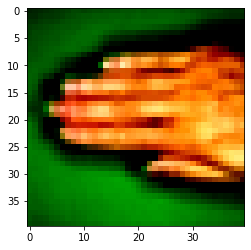

In [993]:
show_image(*dataset[200])

In [994]:
# Setting seed so that value won't change everytime. 
# Splitting the dataset to training, validation, and testing category.
torch.manual_seed(10)
val_size = len(dataset)//10
test_size = len(dataset)//5
train_size = len(dataset) - val_size - test_size

In [995]:
# Random Splitting. 
train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])
len(train_ds), len(val_ds),len(test_ds)  

(3064, 437, 875)

In [996]:
batch_size = 64
train_loader = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size*2, num_workers=2, pin_memory=True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


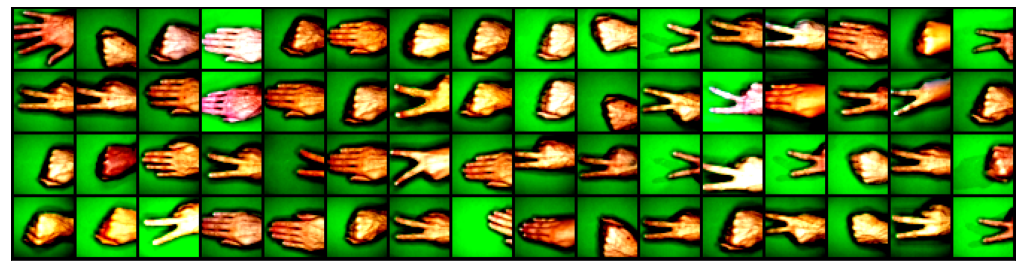

In [997]:
# Multiple images preview. 
for images, labels in train_loader:
    fig, ax = plt.subplots(figsize=(18,10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
    break

In [998]:
 # Baseline model class for training and validation purpose. Evaluation metric function - Accuracy.

def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        if mod_switches['swap_loss_function'] == True:
          loss = F.multi_margin_loss(out, labels) # Calculate loss
        else:
          loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        if mod_switches['swap_loss_function'] == True:
          loss = F.multi_margin_loss(out, labels) # Calculate loss
        else:
          loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

In [999]:
# Functions for evaluation and training.
@torch.no_grad()
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in tqdm(train_loader):
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [1000]:
# To check wether Google Colab GPU has been assigned/not. 

def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [1001]:
device = get_default_device()
device
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

### **Setting up Networks**

In [1002]:
input_size = 3*40*40
output_size = 3

In [1003]:
# Model - 7 Layer
class CnnModel(ImageClassificationBase):
    def __init__(self, classes):
        super().__init__()
        self.classes = classes
        if mod_switches['network_type'] == "remove_convo_layers":
          self.network = nn.Sequential(
              nn.Conv2d(3, 100, kernel_size=3, padding=1),
              nn.ReLU(),
              nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              # Mod 1
              nn.Flatten(), 
              nn.Linear(20000, 64),  

              nn.ReLU(),            
              nn.Linear(64, 32),  
              nn.ReLU(),            
              nn.Linear(32, 16),           
              nn.ReLU(),
              nn.Linear(16, 8),
              nn.ReLU(),
              # nn.Dropout(0.25),
              nn.Linear(8, self.classes))
        elif mod_switches['network_type'] == "remove_linear_layers":
          self.network = nn.Sequential(
              nn.Conv2d(3, 100, kernel_size=3, padding=1),
              nn.ReLU(),
              nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(200, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Flatten(), 
              nn.Linear(6250, 64),
              # nn.Dropout(0.25),
              nn.Linear(64, self.classes))
        elif mod_switches['network_type'] == "efficiency_experiment":
          self.network = nn.Sequential(
              nn.Conv2d(3, 250, kernel_size=3, padding=1),
              nn.ReLU(),
              # nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
              # nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              # nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
              # nn.ReLU(),
              # nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
              # nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Flatten(), 
              nn.Linear(6250, 64),
              # nn.Dropout(0.25),
              nn.Linear(64, self.classes))
        else:
            self.network = nn.Sequential(
              nn.Conv2d(3, 100, kernel_size=3, padding=1),
              nn.ReLU(),
              nn.Conv2d(100, 150, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(150, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(200, 200, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Conv2d(200, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.Conv2d(250, 250, kernel_size=3, stride=1, padding=1),
              nn.ReLU(),
              nn.MaxPool2d(2, 2), 

              nn.Flatten(), 
              nn.Linear(6250, 64),

              nn.ReLU(),            
              nn.Linear(64, 32),  
              nn.ReLU(),            
              nn.Linear(32, 16),           
              nn.ReLU(),
              nn.Linear(16, 8),
              nn.ReLU(),
              nn.Dropout(0.25),
              nn.Linear(8, self.classes))
        
    def forward(self, xb):
        return self.network(xb)

In [1004]:
# Model print
num_classes = 3
model = CnnModel(num_classes)
if torch.cuda.is_available():
  model.cuda()
else:
  model.to(device)


In [1005]:
for images, labels in train_loader:
    out = model(images)
    print('images.shape:', images.shape)    
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([64, 3, 40, 40])
out.shape: torch.Size([64, 3])
out[0]: tensor([ 0.0663, -0.0817, -0.0115], device='cuda:0', grad_fn=<SelectBackward0>)


In [1006]:
train_dl = DeviceDataLoader(train_loader, device)
val_dl = DeviceDataLoader(val_loader, device)
to_device(model, device)

CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(250, 250, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Flatten(start_dim=1, end_dim=-1)
    (10): Linear(in_features=6250, out_features=64, bias=True)
    (11): Linear(in_features=64, out_features=3, bias=True)
  )
)

### **Plotting functions**

In [1007]:
#@title Some functions { display-mode: "form" }
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')
    plt.show()
    
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')
    plt.show()
  
def plot_lr_accuracies(history):
  plt.title('Accuracy vs. No. of epochs from different learning rates')
  for h in history:
    plt.plot([x['val_acc'] for x in h[1]], '-x', label = 'LR '+ str(h[0]))
  plt.legend([x[0] for x in history])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.show()

 

### **FLOPS_counter**

In [1008]:
# FLOPs_counter
def get_model_parm_flops(model, input, detail=False):
    list_conv = []

    def conv_hook(self, input, output):

        # batch_size, input_channels, input_time(ops) ,input_height, input_width = input[0].size()
        # output_channels,output_time(ops) , output_height, output_width = output[0].size()

        kernel_ops = (self.in_channels / self.groups) * 2 - 1  # add operations is one less to the mul operations
        for i in self.kernel_size:
            kernel_ops *= i
        bias_ops = 1 if self.bias is not None else 0

        params = kernel_ops + bias_ops
        flops = params * output[0].nelement()

        list_conv.append(flops)

    list_linear = []

    def linear_hook(self, input, output):
        weight_ops = (2 * self.in_features - 1) * output.nelement()
        bias_ops = self.bias.nelement()
        flops = weight_ops + bias_ops
        list_linear.append(flops)

    list_bn = []

    def bn_hook(self, input, output):
        # (x-x')/σ one sub op and one div op
        # and the shift γ and β
        list_bn.append(input[0].nelement() / input[0].size(0) * 4)

    list_relu = []

    def relu_hook(self, input, output):
        # every input's element need to cmp with 0
        list_relu.append(input[0].nelement() / input[0].size(0))

    list_pooling = []

    def max_pooling_hook(self, input, output):
        # batch_size, input_channels, input_height, input_width = input[0].size()
        # output_channels, output_height, output_width = output[0].size()

        # unlike conv ops. in pool layer ,if the kernel size is a int ,self.input will be a int,not a tuple.
        # so we need to deal with this problem
        if isinstance(self.kernel_size, tuple):
            kernel_ops = torch.prod(torch.Tensor([self.kernel_size]))
        else:
            kernel_ops = self.kernel_size * self.kernel_size
            if len(output[0].size()) > 3:  # 3D max pooling
                kernel_ops *= self.kernel_size
        flops = kernel_ops * output[0].nelement()
        list_pooling.append(flops)

    def avg_pooling_hook(self, input, output):
        # cmp to max pooling ,avg pooling has an additional sub op
        # unlike conv ops. in pool layer ,if the kernel size is a int ,self.input will be a int,not a tuple.
        # so we need to deal with this problem
        if isinstance(self.kernel_size, tuple):
            kernel_ops = torch.prod(torch.Tensor([self.kernel_size]))
        else:
            kernel_ops = self.kernel_size * self.kernel_size
            if len(output[0].size()) > 3:  # 3D  pooling
                kernel_ops *= self.kernel_size
        flops = (kernel_ops + 1) * output[0].nelement()
        list_pooling.append(flops)

    def adaavg_pooling_hook(self, input, output):
        kernel = torch.Tensor([*(input[0].shape[2:])]) // torch.Tensor(list((self.output_size,))).squeeze()
        kernel_ops = torch.prod(kernel)
        flops = (kernel_ops + 1) * output[0].nelement()
        list_pooling.append(flops)

    def adamax_pooling_hook(self, input, output):
        kernel = torch.Tensor([*(input[0].shape[2:])]) // torch.Tensor(list((self.output_size,))).squeeze()
        kernel_ops = torch.prod(kernel)
        flops = kernel_ops * output[0].nelement()
        list_pooling.append(flops)

    def foo(net):
        childrens = list(net.children())
        if not childrens:
            if isinstance(net, torch.nn.Conv2d) or isinstance(net, torch.nn.Conv3d):
                net.register_forward_hook(conv_hook)
            if isinstance(net, torch.nn.Linear):
                net.register_forward_hook(linear_hook)
            if isinstance(net, torch.nn.BatchNorm2d) or isinstance(net, torch.nn.BatchNorm3d):
                net.register_forward_hook(bn_hook)
            if isinstance(net, torch.nn.ReLU):
                net.register_forward_hook(relu_hook)
            if isinstance(net, torch.nn.MaxPool2d) or isinstance(net, torch.nn.MaxPool3d):
                net.register_forward_hook(max_pooling_hook)
            if isinstance(net, torch.nn.AvgPool2d) or isinstance(net, torch.nn.AvgPool3d):
                net.register_forward_hook(avg_pooling_hook)
            if isinstance(net, torch.nn.AdaptiveAvgPool2d) or isinstance(net, torch.nn.AdaptiveAvgPool3d):
                net.register_forward_hook(adaavg_pooling_hook)
            if isinstance(net, torch.nn.AdaptiveMaxPool2d) or isinstance(net, torch.nn.AdaptiveMaxPool3d):
                net.register_forward_hook(adamax_pooling_hook)
            return
        for c in childrens:
            foo(c)

    foo(model)
    out = model(input)
    total_flops = sum(list_conv) + sum(list_linear) + sum(list_bn) + sum(list_relu) + sum(list_pooling)
    return total_flops

    # if detail:
    #     print('  + Conv FLOPs: %.2fG' % (sum(list_conv) / 1e9))
    #     print('  + Linear FLOPs: %.2fG' % (sum(list_linear) / 1e9))
    #     print('  + Batch Norm FLOPs: %.2fG' % (sum(list_bn) / 1e9))
    #     print('  + Relu FLOPs: %.2fG' % (sum(list_relu) / 1e9))
    #     print('  + Pooling FLOPs: %.2fG' % (sum(list_pooling) / 1e9))

## **Training Data**

In [1009]:
lr_array = [0.001]                                                # Without Mod 2
if mod_switches['series_of_learning_rates'] == True:
  # lr_array = [0.001, 0.005, 0.0005, 1, 0.1, 0.01, 0.0001, 0.00001]  # With Mod 2
  # lr_array = [0.001, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0011, 0.0012,]  # With Mod 2
  lr_array = [0.001, 0.0003, 0.0005, 0.0011, 0.00105]  # With Mod 2

num_epochs = 5
if mod_switches["increase_epoch_count"] == True:
  num_epochs = 10

# opt_func = torch.optim.Adam
history_array = []

highest_accuracy = 0
number_flops = 99999999999

try:
  saved_model = torch.load(drive_location + "rps_highest_accurate_model.tar")
  highest_accuracy = saved_model['accuracy']
  number_flops = saved_model['flops']
  print("RPS neural model loaded! Highest accuracy in this assignment so far: ", highest_accuracy * 100, "%")
  print("Learning Rate: ", saved_model['learning_rate'])
  print('FLOPs: FLOPs: %.2fG' % (saved_model['flops'] / 1e9))
  print(saved_model['mods'])
except:
  print("No RPS neural model saved...")

for lr in lr_array:
  device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
  model = to_device(CnnModel(len(classes)), device)
  print("Learning Rate: ", lr)

  if mod_switches['change_optimiser'] == 'default':
    opt_func = torch.optim.Adam
  elif mod_switches['change_optimiser'] == 'SGD':
    opt_func = torch.optim.SGD
  else:
    opt_func = torch.optim.Adam
  
  history=[evaluate(model, val_loader)]
  history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)
  test_split_evaluation = evaluate(model, test_loader)
  model_accuracy = test_split_evaluation['val_acc']
  flops = get_model_parm_flops(CnnModel(3), torch.randn(1, 3, 40, 40))
  print("Test Set Accuracy: ", model_accuracy)

  if model_accuracy > highest_accuracy or (model_accuracy == highest_accuracy and flops < number_flops):
    print("Highest accuracy of the model so far! ", model_accuracy * 100, "%")
    torch.save({
        'state': model.state_dict(), 
        'accuracy': model_accuracy, 
        'learning_rate': lr, 
        'mods': mod_switches, 
        'flops': flops,
        'history': history
        }, 
               drive_location + "rps_highest_accurate_model.tar")
    highest_accuracy = model_accuracy
    number_flops = flops

  print("----")

  history_array.append([lr, history, flops, model_accuracy])

RPS neural model loaded! Highest accuracy in this assignment so far:  100.0 %
Learning Rate:  0.001
FLOPs: FLOPs: 0.61G
{'network_type': 'efficiency_experiment', 'series_of_learning_rates': True, 'resize_value_change': False, 'swap_loss_function': False, 'increase_epoch_count': True, 'data_augmentation': False, 'change_optimiser': 'adam'}
Learning Rate:  0.001


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5163, val_loss: 0.1343, val_acc: 0.9496


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0831, val_loss: 0.0913, val_acc: 0.9738


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0549, val_loss: 0.0654, val_acc: 0.9836


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0184, val_loss: 0.0201, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0142, val_loss: 0.0154, val_acc: 0.9922


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0053, val_loss: 0.0092, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0010, val_loss: 0.0075, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0012, val_loss: 0.0137, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0186, val_loss: 0.0577, val_acc: 0.9805


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0225, val_loss: 0.0624, val_acc: 0.9777
Test Set Accuracy:  0.9765625
----
Learning Rate:  0.0003


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.4207, val_loss: 0.1358, val_acc: 0.9507


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0659, val_loss: 0.0431, val_acc: 0.9902


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0249, val_loss: 0.0298, val_acc: 0.9941


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0141, val_loss: 0.0132, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0119, val_loss: 0.0157, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0094, val_loss: 0.0227, val_acc: 0.9902


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0080, val_loss: 0.0069, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0011, val_loss: 0.0062, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0007, val_loss: 0.0039, val_acc: 1.0000


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0004, val_loss: 0.0046, val_acc: 0.9980
Test Set Accuracy:  0.9988839030265808
----
Learning Rate:  0.0005


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.3521, val_loss: 0.2238, val_acc: 0.9370


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0705, val_loss: 0.0407, val_acc: 0.9883


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0166, val_loss: 0.0306, val_acc: 0.9883


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0120, val_loss: 0.0069, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0067, val_loss: 0.0139, val_acc: 0.9922


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0014, val_loss: 0.0025, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0005, val_loss: 0.0027, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0002, val_loss: 0.0031, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0002, val_loss: 0.0021, val_acc: 1.0000


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0001, val_loss: 0.0025, val_acc: 1.0000
Test Set Accuracy:  1.0
Highest accuracy of the model so far!  100.0 %
----
Learning Rate:  0.0011


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.5603, val_loss: 0.1886, val_acc: 0.9233


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0685, val_loss: 0.0430, val_acc: 0.9844


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0289, val_loss: 0.0241, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0208, val_loss: 0.0549, val_acc: 0.9769


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0158, val_loss: 0.0385, val_acc: 0.9847


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0049, val_loss: 0.0255, val_acc: 0.9941


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0082, val_loss: 0.0106, val_acc: 0.9941


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0172, val_loss: 0.0162, val_acc: 0.9914


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0039, val_loss: 0.0043, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0007, val_loss: 0.0069, val_acc: 0.9980
Test Set Accuracy:  0.9988839030265808
----
Learning Rate:  0.00105


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [0], train_loss: 0.4926, val_loss: 0.2081, val_acc: 0.9417


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [1], train_loss: 0.0558, val_loss: 0.0297, val_acc: 0.9922


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [2], train_loss: 0.0144, val_loss: 0.0164, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [3], train_loss: 0.0191, val_loss: 0.0653, val_acc: 0.9738


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [4], train_loss: 0.0090, val_loss: 0.0062, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [5], train_loss: 0.0111, val_loss: 0.0094, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [6], train_loss: 0.0196, val_loss: 0.0171, val_acc: 0.9922


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [7], train_loss: 0.0028, val_loss: 0.0073, val_acc: 0.9961


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [8], train_loss: 0.0003, val_loss: 0.0054, val_acc: 0.9980


  0%|          | 0/48 [00:00<?, ?it/s]

Epoch [9], train_loss: 0.0001, val_loss: 0.0056, val_acc: 0.9980
Test Set Accuracy:  0.9988839030265808
----


In [1010]:
history_array.sort(key = lambda x: x[3], reverse=True)

print("----\nSorted in order of Accuracy\n-----\n")
for lr_info in history_array:
  if(lr_info[0] == 0.001):
    print("*****")
  print("Learning Rate:", lr_info[0], "\nAccuracy:", lr_info[3] * 100, "%", "\nLoss: ", lr_info[1][len(lr_info[1]) - 1]['val_loss'], '\nFLOPs: %.2fG' % (lr_info[2] / 1e9), "\n-----")

----
Sorted in order of Accuracy
-----

Learning Rate: 0.0005 
Accuracy: 100.0 % 
Loss:  0.002545801689848304 
FLOPs: 0.24G 
-----
Learning Rate: 0.0003 
Accuracy: 99.88839030265808 % 
Loss:  0.004615343175828457 
FLOPs: 0.24G 
-----
Learning Rate: 0.0011 
Accuracy: 99.88839030265808 % 
Loss:  0.006881574168801308 
FLOPs: 0.24G 
-----
Learning Rate: 0.00105 
Accuracy: 99.88839030265808 % 
Loss:  0.005563394166529179 
FLOPs: 0.24G 
-----
*****
Learning Rate: 0.001 
Accuracy: 97.65625 % 
Loss:  0.062377143651247025 
FLOPs: 0.24G 
-----


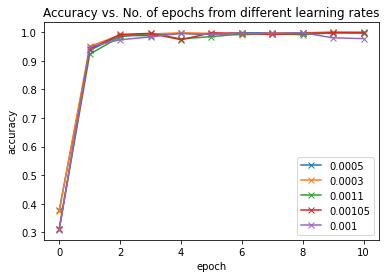

Learning Rate: 0.0005 



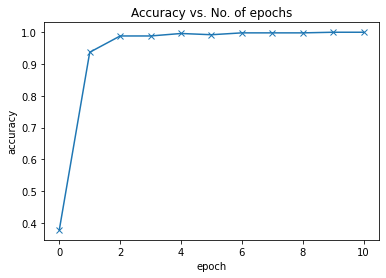

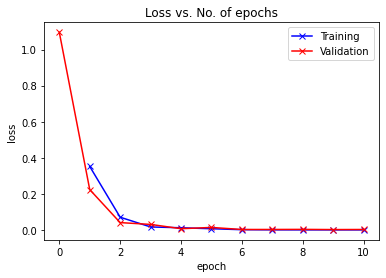



Learning Rate: 0.0003 



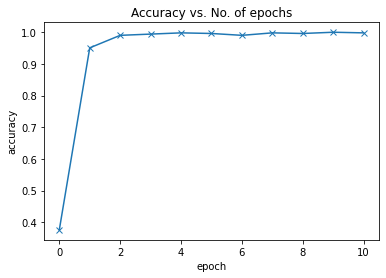

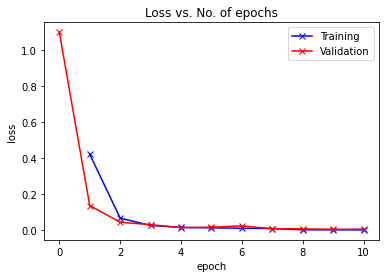



Learning Rate: 0.0011 



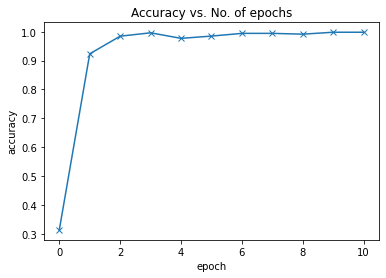

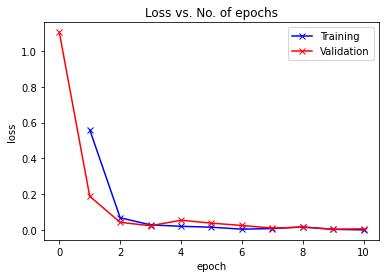



Learning Rate: 0.00105 



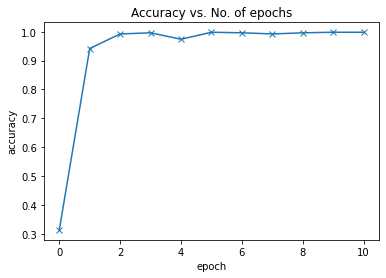

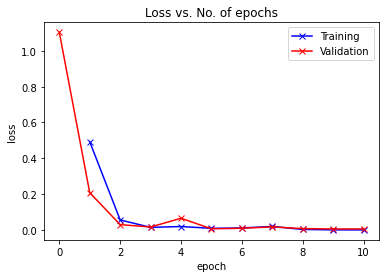



Learning Rate: 0.001 



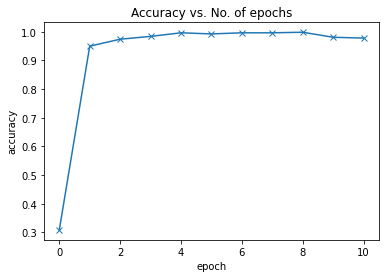

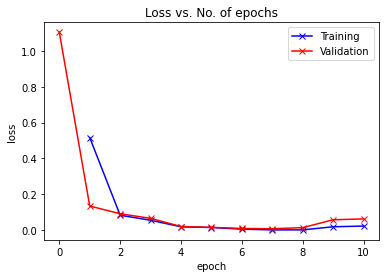

In [1011]:
if len(history_array) > 1:
  plot_lr_accuracies(history_array)

for lr_info in history_array:
  print("Learning Rate:", lr_info[0], "\n")
  plot_accuracies(lr_info[1])
  plot_losses(lr_info[1])
  print("\n")

Accuracy:  100.0 %
Learning Rate:  0.0005
FLOPs: FLOPs: 0.24G
{'network_type': 'efficiency_experiment', 'series_of_learning_rates': True, 'resize_value_change': False, 'swap_loss_function': False, 'increase_epoch_count': True, 'data_augmentation': False, 'change_optimiser': 'adam'}


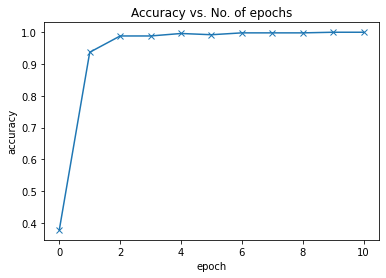

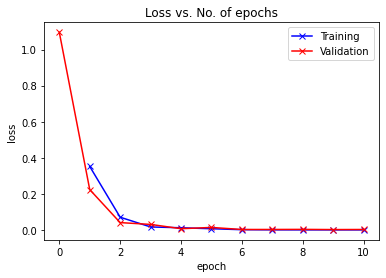

In [1012]:
# Output the graph of the highest accuracy model
try:
  highest_accuracy_model = torch.load(drive_location + "rps_highest_accurate_model.tar")
  print("Accuracy: ", highest_accuracy_model['accuracy'] * 100, "%")
  print("Learning Rate: ", highest_accuracy_model['learning_rate'])
  print('FLOPs: FLOPs: %.2fG' % (highest_accuracy_model['flops'] / 1e9))
  print(highest_accuracy_model['mods'])
  plot_accuracies(highest_accuracy_model['history'])
  plot_losses(highest_accuracy_model['history'])
except:
  print("No model found! Invalid model type, or training not concluded?")

In [1013]:
# model = to_device(CnnModel(len(classes)), device)

In [1014]:
# history=[evaluate(model, val_loader)]

In [1015]:
# num_epochs = 5
# opt_func = torch.optim.Adam

# # Mod 2
# # lr = 1
# # lr = 0.1
# # lr = 0.01
# # lr = 0.001      # Default
# # lr = 0.0001
# # lr = 0.00001
# # lr = 0.005
# lr = 0.0005

In [1016]:
# history+= fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [1017]:
# plot_accuracies(history)

In [1018]:
# plot_losses(history)

In [1019]:
# evaluate(model, test_loader)

## **FLOPs**

In [1020]:
#  #The code from https://cloudstor.aarnet.edu.au/plus/s/PcSc67ZncTSQP0E can be used to count flops
# #Download the code.
# !wget -c https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
# !mv download FLOPs_counter.py
# #!rm -rf download

In [1021]:
# from FLOPs_counter import print_model_parm_flops
# input = torch.randn(1, 3, 40, 40) # The input size should be the same as the size that you put into your model 
# #Get the network and its FLOPs
# num_classes = 3
# model = CnnModel(num_classes)
# print_model_parm_flops(model, input, detail=False)